# Introduction

The notebook is intended to experiment with PyTorch regarding the training monitoring.

In [1]:
# Import Standard Libraries
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

import sklearn.datasets

# Read Data

In [2]:
# Import Sklearn dataset (Coordinates and a 0-1 label)
x, y = sklearn.datasets.make_moons(200, noise=0.20)

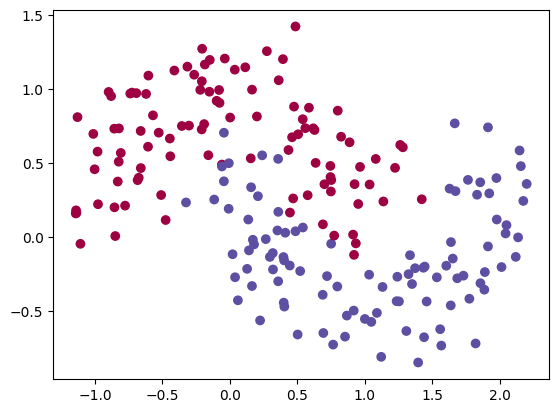

In [3]:
# Plot the data
plt.scatter(x[:, 0], 
            x[:, 1], 
            c=y, 
            cmap=plt.cm.Spectral)
plt.show()

The data are not linearly separable (Data are non-linear). It would require something more complicated than a Linear Regression.

In [4]:
# Convert the data to Tensors
x = torch.FloatTensor(x)
y = torch.LongTensor(y)

# Model Definition

In [5]:
# Define the Neural Network
class Model(nn.Module):
    
    def __init__(self, input_features, hidden_layer_features, output_features):
        
        # Call the nn.Module constructor
        super(Model, self).__init__()
        
        # Define the network architecture
        self.fully_connected_layer_1 = nn.Linear(in_features=input_features, 
                                                 out_features=hidden_layer_features)
        
        self.fully_connected_layer_2 = nn.Linear(in_features=hidden_layer_features, 
                                                 out_features=output_features)
        
        # Define hidden layer and output layer activation functions
        self.hidden_layers_activation_function = nn.ReLU()
        
    def forward(self, x):
        
        # Feed forward the input x through the whole neural network
        output_1 = self.fully_connected_layer_1(x)
        output_1 = self.hidden_layers_activation_function(output_1)
        
        output = self.fully_connected_layer_2(output_1)
        
        return output

In [6]:
# Instantiate the neural network
# NOTE: Output layer is composed by 2 neurons because we have 2 classes and we do not use Sigmoid activation function
neural_network = Model(2, 50, 2)

In [11]:
# Define the Optimiser
sgd = torch.optim.SGD(neural_network.parameters(), 
                      lr=0.2)

In [8]:
# Define the Loss Function
# NOTE: We can not use BCE because the NN output layer has 2 neurons and not 1
ce = nn.CrossEntropyLoss()

# Training

In [14]:
# Hyperparameters
epochs = 10000

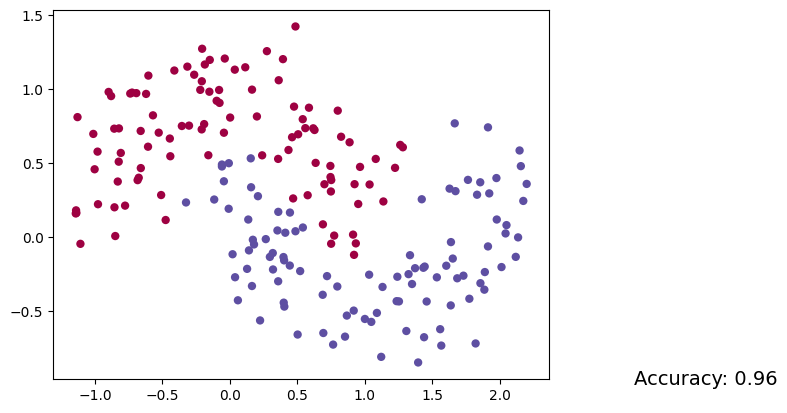

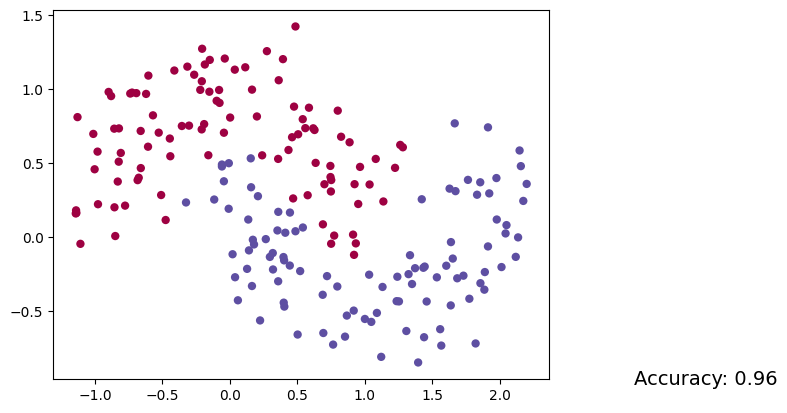

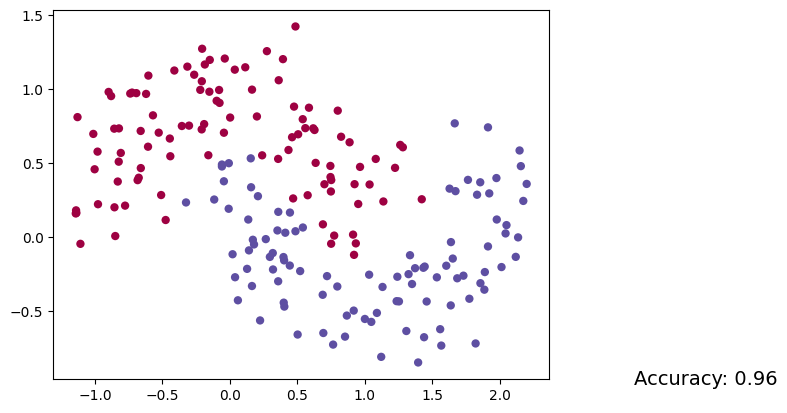

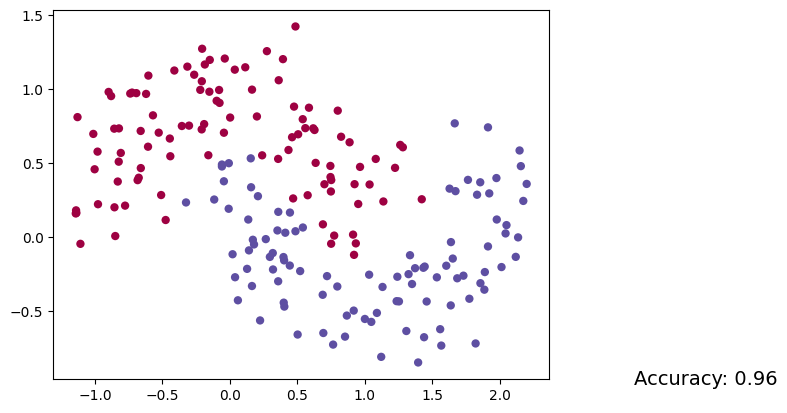

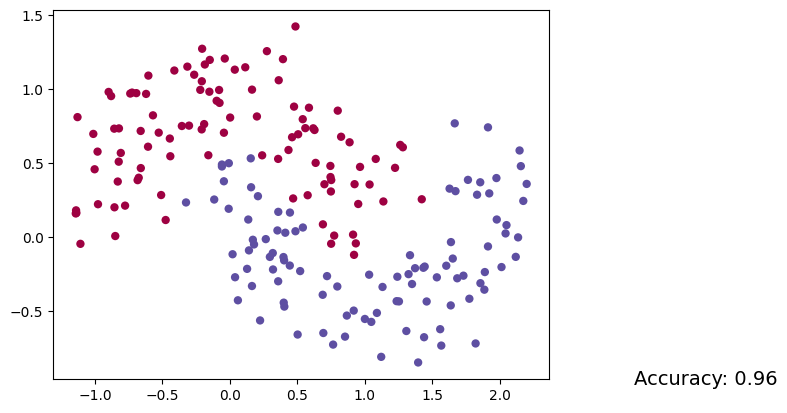

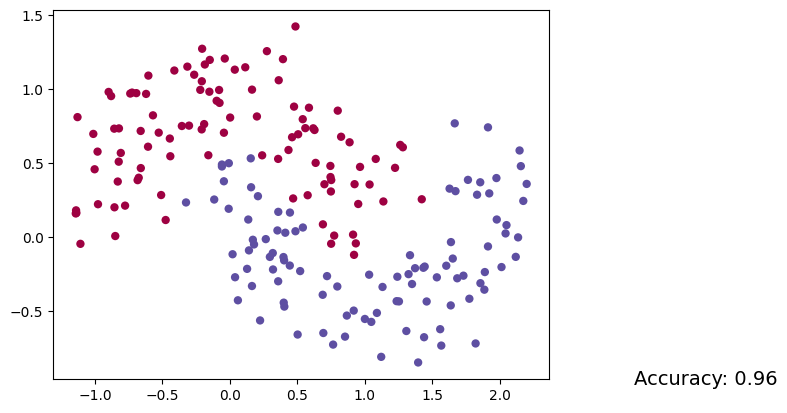

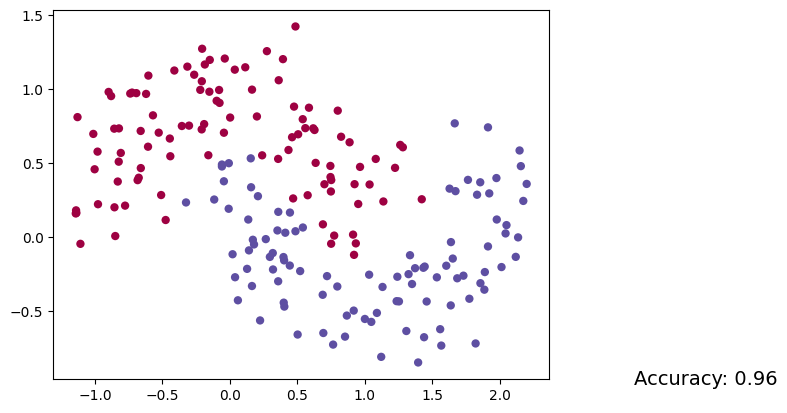

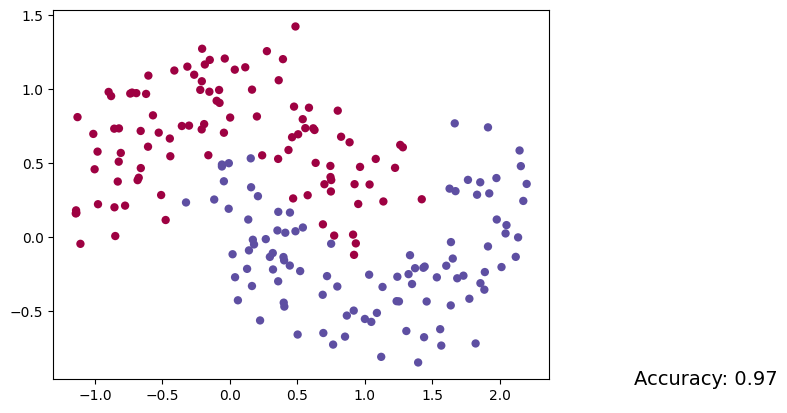

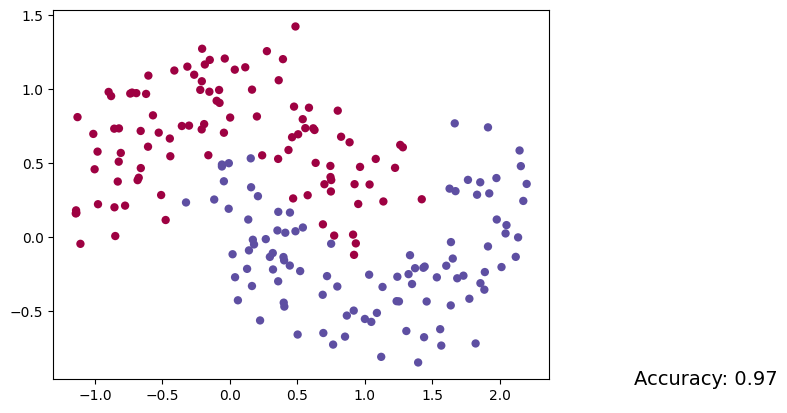

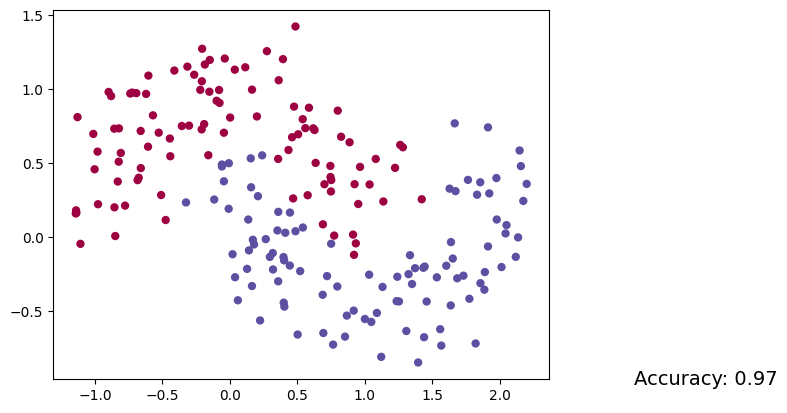

In [15]:
# Set Matplotlib the interrupt mode on
plt.ion()

for epoch in range(epochs):
    
    # Feed forward
    output = neural_network(x)
    
    # Compute the loss
    loss = ce(output, y)
    
    # Clear the gradient buffer
    sgd.zero_grad()
    
    # Backpropagate
    loss.backward()
    
    # Update the weights
    sgd.step()
    
    # Plot the learning process every 1000 epochs
    if epoch % 1000 == 0:
        
        # Take the max between the output (We have a Softmax)
        max_value, prediction = torch.max(output, 1)
        
        # Convert to Numpy to plot it through Matplotlib
        predicted_y = prediction.data.numpy()
        target_y = y.data.numpy()
        
        # Plot the learning process
        plt.scatter(x.data.numpy()[:, 0], 
                    x.data.numpy()[:, 1], 
                    c=predicted_y, 
                    lw=0,
                    cmap=plt.cm.Spectral)
        
        # Compute the accuracy
        accuracy = (predicted_y == target_y).sum() / target_y.size
        
        # Display the accuracy in the plot at coordinate (3, -1)
        plt.text(3, 
                 -1, 
                 'Accuracy: {:.2f}'.format(accuracy), 
                 fontdict={'size': 14})
        
        # Pause the plot until it gets updated
        plt.pause(0.1)
        
plt.ioff()
plt.show()